<a href="https://colab.research.google.com/github/Aarav-H/FM-Assignment/blob/main/regression-notebooks/HPCL_Beta_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
warnings.filterwarnings("ignore")

NameError: name 'warnings' is not defined

In [ ]:
#Download stock prices for the security monthly data last 5 years
HPCL_df = yf.download('HINDPETRO.NS',
                      start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo'
)
HPCL_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-01,348.100006,436.399994,344.049988,398.899994,387.732574,256695748
2024-01-01,406.000000,485.299988,393.100006,463.250000,450.281067,190027096
2024-02-01,467.950012,594.799988,456.000000,509.399994,495.139069,240233578
2024-03-01,516.000000,531.450012,443.049988,475.649994,475.649994,141184871
2024-04-01,476.049988,484.700012,449.250000,461.200012,461.200012,37922842


In [ ]:
#Download Market index closing prices
NIFTY_df = yf.download('^NSEI',start='2019-04-06',
                      end='2024-04-06',
                      progress=False,interval ='1mo',
)
NIFTY_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-01,11725.549805,12041.150391,11108.299805,11922.799805,11922.799805,8645600
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000


In [ ]:
#Calculate Log returns(HPCL)
HPCL_df['Return_HPCL'] = np.log(HPCL_df['Adj Close']/HPCL_df['Adj Close'].shift(1))
print(HPCL_df['Return_HPCL'])

Date
2019-05-01         NaN
2019-06-01   -0.111462
2019-07-01   -0.056349
2019-08-01   -0.022426
2019-09-01    0.148175
2019-10-01    0.075161
2019-11-01   -0.140562
2019-12-01   -0.066191
2020-01-01   -0.129166
2020-02-01   -0.162683
2020-03-01   -0.038442
2020-04-01    0.147440
2020-05-01   -0.124301
2020-06-01    0.108055
2020-07-01   -0.008107
2020-08-01   -0.019760
2020-09-01   -0.109476
2020-10-01    0.038017
2020-11-01    0.109429
2020-12-01    0.040029
2021-01-01    0.003207
2021-02-01    0.103552
2021-03-01   -0.033340
2021-04-01    0.000639
2021-05-01    0.175623
2021-06-01    0.047137
2021-07-01   -0.115760
2021-08-01    0.097818
2021-09-01    0.118033
2021-10-01    0.034079
2021-11-01   -0.050548
2021-12-01   -0.009363
2022-01-01    0.071760
2022-02-01   -0.139324
2022-03-01   -0.014375
2022-04-01    0.003521
2022-05-01   -0.171064
2022-06-01   -0.047649
2022-07-01    0.104600
2022-08-01    0.009903
2022-09-01   -0.064104
2022-10-01   -0.011391
2022-11-01    0.111607
2022-1

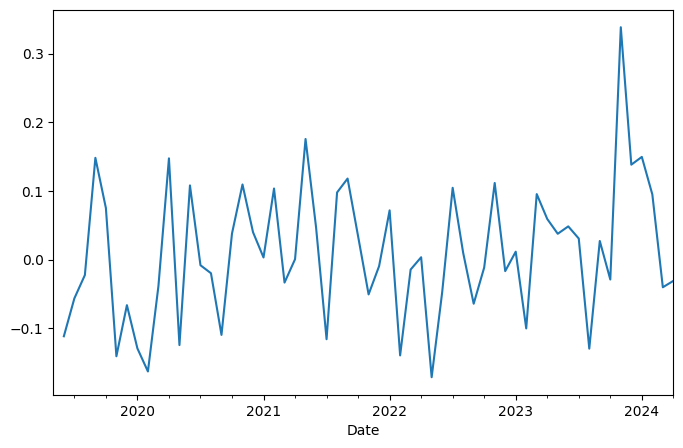

In [ ]:
HPCL_df['Return_HPCL'].plot(figsize=(8,5))
plt.show()

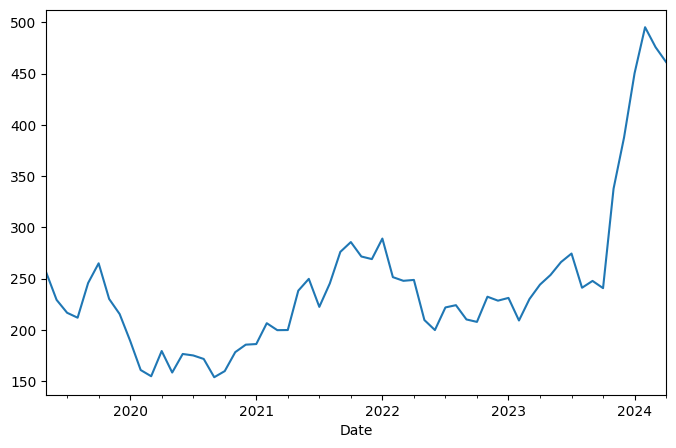

In [ ]:
HPCL_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
HPCL_df1 = HPCL_df.dropna(axis=0)
HPCL_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_HPCL
Date,,,,,,,
2019-06-01,333.299988,333.500000,283.350006,290.049988,229.311890,94870189,-0.111462
2019-07-01,289.500000,301.250000,249.949997,266.049988,216.747650,103459751,-0.056349
2019-08-01,264.500000,269.200012,223.750000,260.149994,211.940994,87447509,-0.022426
2019-09-01,260.149994,312.700012,244.250000,301.700012,245.791275,168132499,0.148175
2019-10-01,310.000000,328.750000,298.149994,325.250000,264.977173,127162423,0.075161


In [ ]:
#Caclulate log returns(NIFTY50)
NIFTY_df['Return_NIFTY'] = np.log(NIFTY_df['Adj Close']/NIFTY_df['Adj Close'].shift(1))
print(NIFTY_df['Return_NIFTY'])

Date
2019-05-01         NaN
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
2019-11-01    0.014925
2019-12-01    0.009280
2020-01-01   -0.017103
2020-02-01   -0.065673
2020-03-01   -0.264569
2020-04-01    0.136976
2020-05-01   -0.028767
2020-06-01    0.072639
2020-07-01    0.072203
2020-08-01    0.027966
2020-09-01   -0.012366
2020-10-01    0.034503
2020-11-01    0.107904
2020-12-01    0.075195
2021-01-01   -0.025142
2021-02-01    0.063546
2021-03-01    0.011058
2021-04-01   -0.004065
2021-05-01    0.063018
2021-06-01    0.008861
2021-07-01    0.002639
2021-08-01    0.083291
2021-09-01    0.027970
2021-10-01    0.003032
2021-11-01   -0.039737
2021-12-01    0.021601
2022-01-01   -0.000819
2022-02-01   -0.031992
2022-03-01    0.039169
2022-04-01   -0.020957
2022-05-01   -0.030756
2022-06-01   -0.049712
2022-07-01    0.083720
2022-08-01    0.034430
2022-09-01   -0.038161
2022-10-01    0.052301
2022-11-01    0.040590
2022-1

In [ ]:
NIFTY_df1 = NIFTY_df.dropna(axis=0)
NIFTY_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2019-06-01,11953.750000,12103.049805,11625.099609,11788.849609,11788.849609,6788000,-0.011298
2019-07-01,11839.900391,11981.750000,10999.400391,11118.000000,11118.000000,9988500,-0.058589
2019-08-01,11060.200195,11181.450195,10637.150391,11023.250000,11023.250000,11153100,-0.008559
2019-09-01,10960.950195,11694.849609,10670.250000,11474.450195,11474.450195,12210000,0.040116
2019-10-01,11515.400391,11945.000000,11090.150391,11877.450195,11877.450195,15461000,0.034519


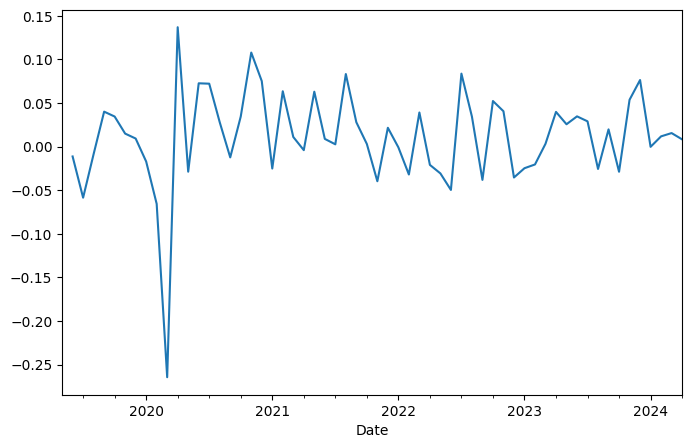

In [ ]:
NIFTY_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

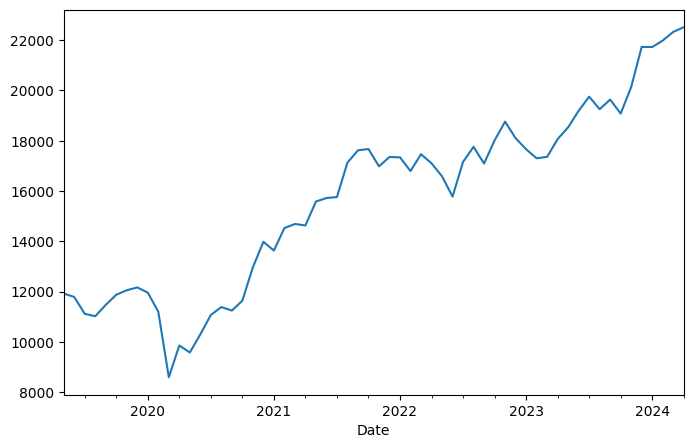

In [ ]:
NIFTY_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [ ]:
HPCL_df1_returns = HPCL_df1['Return_HPCL']
HPCL_df1_returns.head()


Date
2019-06-01   -0.111462
2019-07-01   -0.056349
2019-08-01   -0.022426
2019-09-01    0.148175
2019-10-01    0.075161
Name: Return_HPCL, dtype: float64

In [ ]:
NIFTY_df1_returns = NIFTY_df1['Return_NIFTY']
NIFTY_df1_returns.head()

Date
2019-06-01   -0.011298
2019-07-01   -0.058589
2019-08-01   -0.008559
2019-09-01    0.040116
2019-10-01    0.034519
Name: Return_NIFTY, dtype: float64

In [ ]:
returns = pd.merge(NIFTY_df1_returns,HPCL_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_HPCL
count,59.000000,59.000000
mean,0.010774,0.009954
std,0.055822,0.098802
min,-0.264569,-0.171064
25%,-0.020723,-0.049098
50%,0.011058,0.003207
75%,0.039495,0.085064
max,0.136976,0.338259


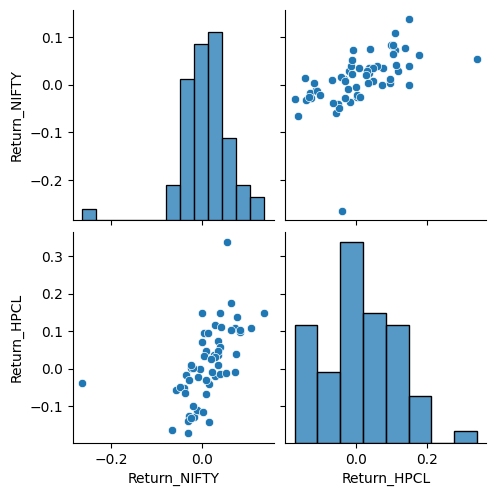

In [ ]:
sns.pairplot(returns)
plt.show()

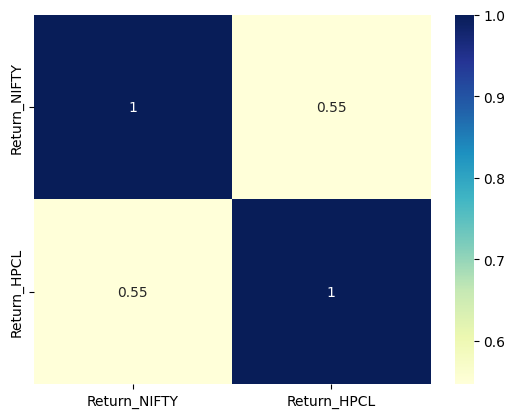

In [ ]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_HPCL']
x_sm = sm.add_constant(x)

#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [ ]:
#Regression - Market model
model = sm.OLS(y,x_sm)

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [ ]:
results = model.fit()

In [ ]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_HPCL   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     24.35
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           7.34e-06
Time:                        18:02:57   Log-Likelihood:                 63.843
No. Observations:                  59   AIC:                            -123.7
Df Residuals:                      57   BIC:                            -119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0005      0.011     -0.043      0.966      -0.023       0.022
Return_NIFTY     0.9683      0.196      4.934      0.000       0.575       1.361
==============================================================================
Omnibus:                       11.090   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.388
Skew:                           0.796   Prob(JB):                      0.00204
Kurtosis:                       4.583   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Beta for HPCL stock = 0.9683 and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-06-01 to 2024-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_HPCL   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_HPCL'>

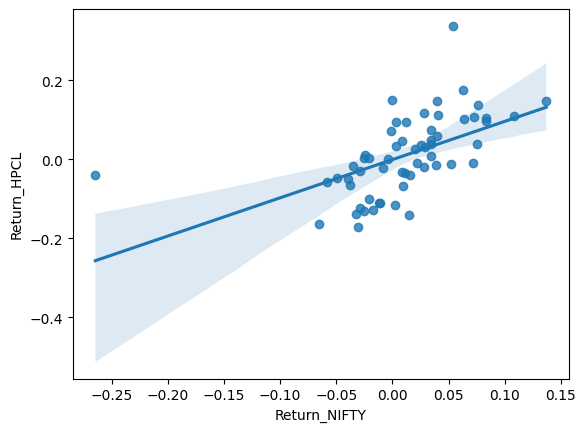

In [ ]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_HPCL', data = returns)

In [ ]:
print('resid', results.resid)

resid Date
2019-06-01   -0.100043
2019-07-01    0.000861
2019-08-01   -0.013660
2019-09-01    0.109809
2019-10-01    0.042215
2019-11-01   -0.154535
2019-12-01   -0.074698
2020-01-01   -0.112126
2020-02-01   -0.098613
2020-03-01    0.218221
2020-04-01    0.015284
2020-05-01   -0.095967
2020-06-01    0.038197
2020-07-01   -0.077542
2020-08-01   -0.046361
2020-09-01   -0.097023
2020-10-01    0.005086
2020-11-01    0.005423
2020-12-01   -0.032304
2021-01-01    0.028031
2021-02-01    0.042498
2021-03-01   -0.043568
2021-04-01    0.005054
2021-05-01    0.115080
2021-06-01    0.039035
2021-07-01   -0.117837
2021-08-01    0.017645
2021-09-01    0.091428
2021-10-01    0.031622
2021-11-01   -0.011591
2021-12-01   -0.029801
2022-01-01    0.073031
2022-02-01   -0.107868
2022-03-01   -0.051824
2022-04-01    0.024292
2022-05-01   -0.140804
2022-06-01    0.000966
2022-07-01    0.024013
2022-08-01   -0.022957
2022-09-01   -0.026674
2022-10-01   -0.061557
2022-11-01    0.072782
2022-12-01    0.018131


<ipython-input-36-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


count    5.900000e+01
mean     8.232586e-19
std      8.270515e-02
min     -1.545349e-01
25%     -5.327080e-02
50%      5.054410e-03
75%      3.714907e-02
max      2.866926e-01
dtype: float64

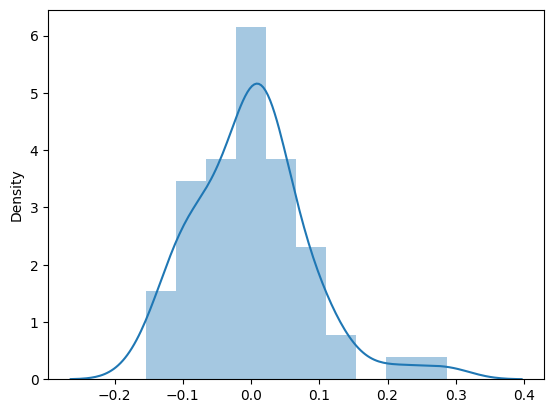

In [ ]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [ ]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 9.025286605677675, 'Test Statistic p-value': 0.010969426304363827, 'F-Statistic': 5.056717843782278, 'F-Test p-value': 0.009575300520366868}


#The errors are homoskedastic as per the White test


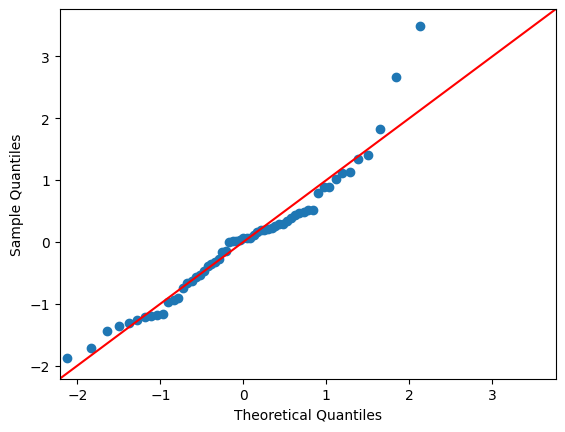

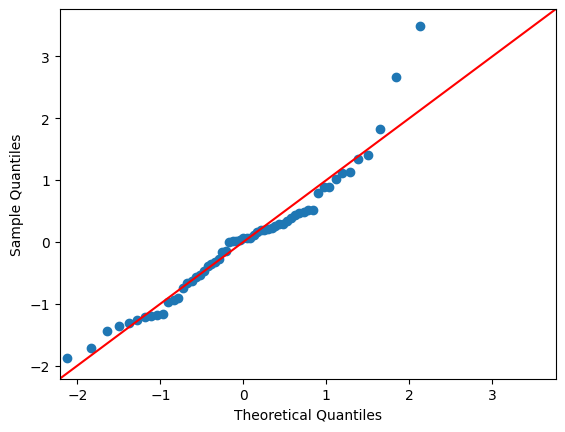

In [ ]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [ ]:
stats.normaltest(results.resid)

NormaltestResult(statistic=11.089948934958652, pvalue=0.003907042959380709)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.